In [ ]:
import sys
import os
import datetime
import sys
import glob

path = 'c:\\adhoc\\ctd'

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

    
for filename in glob.glob(os.path.join(path, '*.txt')):
    with open(filename) as inFile, open(filename + '.tab', 'w') as outFile:
        for line in inFile:
            (timestamp,source,data) = line.split('|',3)
            values = data.split()
            if(len(values) == 6) and all(is_number(i) for i in values[0:5]):
                (Press,Temp,Cond,Sal,SoundV,Time) = values
                outFile.write("\r{0}\t{1}\t{2}\t{3}\t{4}\t{5}\t{6}\t{7}".format(source,timestamp,Press,Temp,Cond,Sal,SoundV,Time))
outFile.close() 


In [11]:
import os
import pandas as pd
import numpy as np
import glob

path = 'c:\\adhoc\\ctd'

#list the files
filelist = glob.glob(os.path.join(path, '*.tab'))
df_list = [pd.read_table(file, skiprows=0,skip_blank_lines=True, header=None,parse_dates=[1],infer_datetime_format=True, names=['source','timestamp','Press','Temp','Cond','Sal','SoundV','Time'], dtype={'Press': np.float16, 'Temp': np.float16, 'Cond':np.float16,'Sal': np.float16, 'SoundV':np.float16 }) for  file in filelist]

# concatenate them together
big_df = pd.concat(df_list)


In [12]:
big_df.head(n=5)


,source,timestamp,Press,Temp,Cond,Sal,SoundV,Time
0,I-OCEAN7-304-XXXX,2016-03-02 14:17:28.627,26.812500,8.21875,32.0,30.3125,1478.0,33:83:00.54M
1,I-OCEAN7-304-XXXX,2016-03-02 14:17:29.642,26.859375,8.21875,32.0,30.3125,1478.0,33:83:01.55M
2,I-OCEAN7-304-XXXX,2016-03-02 14:17:30.652,26.937500,8.21875,32.0,30.3125,1478.0,33:83:02.57M
3,I-OCEAN7-304-XXXX,2016-03-02 14:17:31.662,27.031250,8.21875,32.0,30.3125,1478.0,33:83:03.58M
4,I-OCEAN7-304-XXXX,2016-03-02 14:17:32.677,27.046875,8.21875,32.0,30.3125,1478.0,33:83:04.59M


In [13]:
big_df.dtypes


source               object
timestamp    datetime64[ns]
Press               float16
Temp                float16
Cond                float16
Sal                 float16
SoundV              float16
Time                 object
dtype: object

In [14]:
big_df['day'] = big_df['timestamp'].apply(lambda x: x.date())


In [5]:
big_df.dtypes

source               object
timestamp    datetime64[ns]
Press               float16
Temp                float16
Cond                float16
Sal                 float16
SoundV              float16
Time                 object
day                  object
dtype: object

In [6]:
big_df.head(n=5)

,source,timestamp,Press,Temp,Cond,Sal,SoundV,Time,day
0,I-OCEAN7-304-XXXX,2016-03-02 14:17:28.627,26.812500,8.21875,32.0,30.3125,1478.0,33:83:00.54M,2016-03-02
1,I-OCEAN7-304-XXXX,2016-03-02 14:17:29.642,26.859375,8.21875,32.0,30.3125,1478.0,33:83:01.55M,2016-03-02
2,I-OCEAN7-304-XXXX,2016-03-02 14:17:30.652,26.937500,8.21875,32.0,30.3125,1478.0,33:83:02.57M,2016-03-02
3,I-OCEAN7-304-XXXX,2016-03-02 14:17:31.662,27.031250,8.21875,32.0,30.3125,1478.0,33:83:03.58M,2016-03-02
4,I-OCEAN7-304-XXXX,2016-03-02 14:17:32.677,27.046875,8.21875,32.0,30.3125,1478.0,33:83:04.59M,2016-03-02


In [15]:
import numpy as np
pd.set_option("display.max_rows",150)
grouped = big_df.groupby('day')
grouped['Sal'].aggregate([np.mean, np.min, np.max])


,mean,amin,amax
day,,,
2016-03-02,30.671875,29.921875,32.062500
2016-03-03,31.609375,13.843750,33.031250
2016-03-04,31.578125,30.640625,33.031250
2016-03-05,31.718750,30.390625,33.187500
2016-03-06,31.718750,30.359375,33.218750
2016-03-07,31.843750,30.171875,33.250000
2016-03-08,31.781250,29.968750,33.218750
2016-03-09,31.937500,30.406250,33.187500
2016-03-10,32.281250,31.687500,33.687500


In [17]:
import numpy as np
pd.set_option("display.max_rows",150)
grouped = big_df.groupby('day')
gp_df = grouped['Sal'].aggregate([np.mean, np.min, np.max])

In [18]:
gp_df.head(n=5)

,mean,amin,amax
day,,,
2016-03-02,30.671875,29.921875,32.06250
2016-03-03,31.609375,13.843750,33.03125
2016-03-04,31.578125,30.640625,33.03125
2016-03-05,31.718750,30.390625,33.18750
2016-03-06,31.718750,30.359375,33.21875


In [10]:
pd.get_option("display.max_rows")

101

In [19]:
type(gp_df)

pandas.core.frame.DataFrame

In [21]:
gp_df.reset_index()

,day,mean,amin,amax
0,2016-03-02,30.671875,29.921875,32.062500
1,2016-03-03,31.609375,13.843750,33.031250
2,2016-03-04,31.578125,30.640625,33.031250
3,2016-03-05,31.718750,30.390625,33.187500
4,2016-03-06,31.718750,30.359375,33.218750
5,2016-03-07,31.843750,30.171875,33.250000
6,2016-03-08,31.781250,29.968750,33.218750
7,2016-03-09,31.937500,30.406250,33.187500
8,2016-03-10,32.281250,31.687500,33.687500
9,2016-03-11,32.437500,31.937500,33.812500


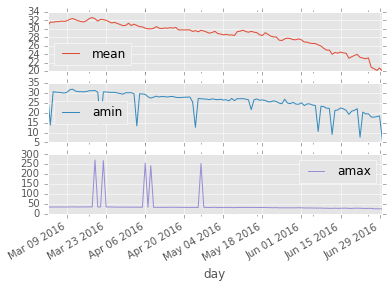

In [28]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


gp_df.plot(subplots=True);